In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Found 2618 files belonging to 2 classes.


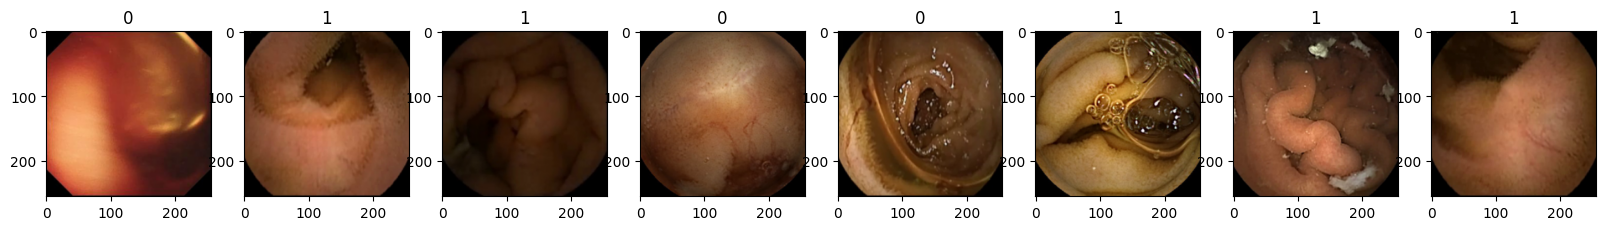

In [8]:
# Import necessary libraries
import tensorflow as tf  # Import TensorFlow for deep learning operations
import os               # Import OS for file and directory operations
import numpy as np     # Import NumPy for numerical operations
from matplotlib import pyplot as plt  # Import Matplotlib for data visualization

# Load image data from the 'data' directory using TensorFlow's image_dataset_from_directory function
data = tf.keras.utils.image_dataset_from_directory('data')

# Create an iterator to iterate through the data
data_iterator = data.as_numpy_iterator()

# Get a batch of data from the iterator
batch = data_iterator.next()

# Check the length of the batch
len(batch)

# Display the labels of the batch (0 for bleeding, 1 for non-bleeding)
batch[1]

# Create a figure with 8 subplots for displaying sample images
fig, ax = plt.subplots(ncols=8, figsize=(20, 20))

# Loop through the first 8 images in the batch and display them along with their labels
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [9]:
# Scale the image data by dividing it by 255 to normalize pixel values
scaled = batch[0]
data = data.map(lambda x, y: (x / 255, y))

# Check the maximum pixel value in the normalized data
data.as_numpy_iterator().next()[0].max()

# Get the total number of samples in the dataset
len(data)

# Split the dataset into training, validation, and test sets based on specified proportions
train_size = int(len(data) * 0.7) + 1  # 70% for training
val_size = int(len(data) * 0.2)        # 20% for validation
test_size = int(len(data) * 0.1)       # 10% for testing

# Check the sum of sizes for verification
val_size + train_size + test_size

# Create training, validation, and test datasets using the split sizes
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# Train CNN model

model = Sequential()
# Create a Sequential model to build the CNN

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten the output from the Convolutional layers to prepare for the fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with the Adam optimizer, binary cross-entropy loss function, and accuracy metric
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [12]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
58/58 [==============================] - 33s 555ms/step - loss: 0.5367 - accuracy: 0.7284 - val_loss: 0.2682 - val_accuracy: 0.8945
Epoch 2/20
58/58 [==============================] - 32s 542ms/step - loss: 0.2674 - accuracy: 0.8976 - val_loss: 0.1473 - val_accuracy: 0.9492
Epoch 3/20
58/58 [==============================] - 32s 544ms/step - loss: 0.1467 - accuracy: 0.9407 - val_loss: 0.1179 - val_accuracy: 0.9668
Epoch 4/20
58/58 [==============================] - 32s 552ms/step - loss: 0.0913 - accuracy: 0.9639 - val_loss: 0.1543 - val_accuracy: 0.9473
Epoch 5/20
58/58 [==============================] - 33s 561ms/step - loss: 0.0887 - accuracy: 0.9655 - val_loss: 0.1047 - val_accuracy: 0.9570
Epoch 6/20
58/58 [==============================] - 32s 545ms/step - loss: 0.0544 - accuracy: 0.9790 - val_loss: 0.0343 - val_accuracy: 0.9922
Epoch 7/20
58/58 [==============================] - 32s 554ms/step - loss: 0.0357 - accuracy: 0.9881 - val_loss: 0.0641 - val_accuracy: 0.9824

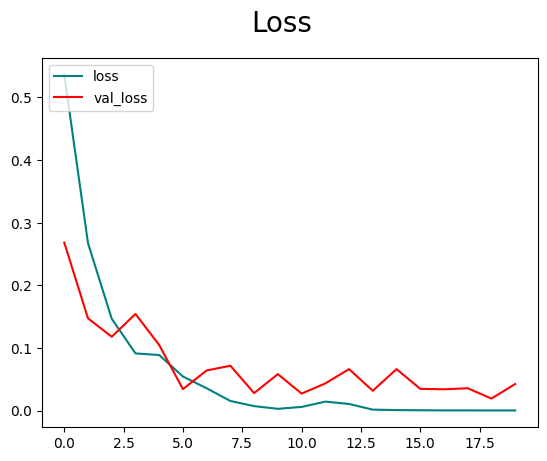

In [13]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

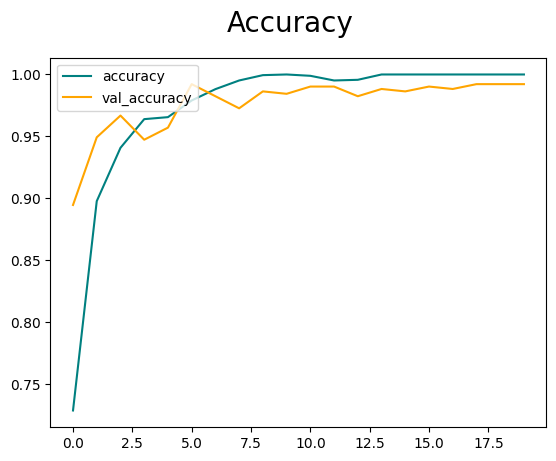

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [28]:
# Import necessary metrics from TensorFlow/Keras
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# Create instances of Precision, Recall, and BinaryAccuracy metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

# Iterate through the test dataset using an iterator
for batch in test.as_numpy_iterator():
    X, y = batch  # Get the batch of input data (X) and true labels (y)
    yhat = model.predict(X)  # Make predictions using the trained model
    
    # Update the Precision, Recall, and BinaryAccuracy metrics with the batch results
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

# Print the calculated Precision, Recall, and Binary Accuracy metrics
print("Precision:", pre.result())
print("Recall:", re.result())
print("Binary Accuracy:", acc.result())

# Calculate the F1 score using the Precision and Recall values
F1 = 2 * (pre.result() * re.result() / (pre.result() + re.result()))

# Print the computed F1 score
print("F1 score is", F1)


1/1 [==============================] - 0s 122ms/step
Precision: tf.Tensor(0.9699248, shape=(), dtype=float32)
Recall: tf.Tensor(0.96268654, shape=(), dtype=float32)
Binary Accuracy: tf.Tensor(0.964, shape=(), dtype=float32)
F1 score is tf.Tensor(0.96629214, shape=(), dtype=float32)


In [29]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


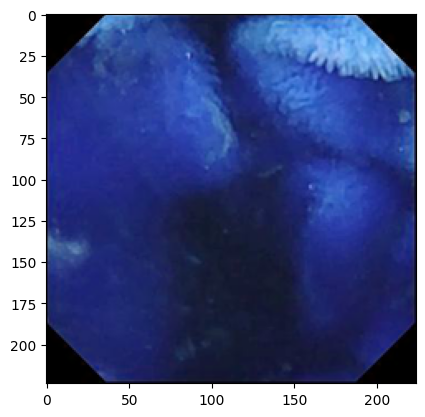

In [36]:
import cv2
img = cv2.imread('bb.png')
plt.imshow(img)
plt.show()

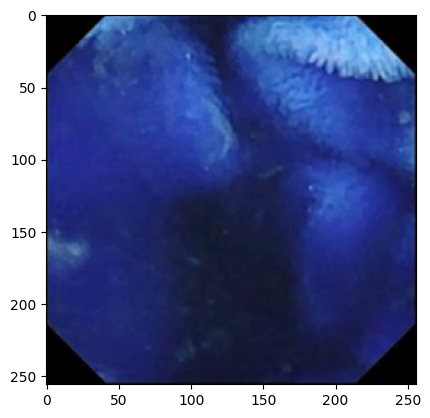

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
# Make a prediction using the model on a new data point (assuming 'resize' is an image)
yhat = model.predict(np.expand_dims(resize / 255, 0))

1/1 [==============================] - 0s 23ms/step


In [ ]:
yhat

In [40]:
# Check if the predicted probability is greater than 0.01 to classify the result
if yhat > 0.01: 
    print(f'Predicted class is non-bleeding')
else:
    print(f'Predicted class is bleeding')

Predicted class is bleeding


In [41]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','bleeding_nonbleeding.h5'))

new_model = load_model(os.path.join('models','bleeding_nonbleeding.h5'))
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 54ms/step


array([[4.7227286e-31]], dtype=float32)

In [42]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [45]:
import os
import numpy as np
from PIL import Image  # You may need to install the Pillow library
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_data_dir = 'test'  # Use the same directory as your training/validation data

# Get a list of subdirectories in the test dataset directory
test_dataset_folders = [folder for folder in os.listdir(test_data_dir) if os.path.isdir(os.path.join(test_data_dir, folder))]

# Initialize lists to store image data and file names
prediction_images = []
image_names = []

# Process each subdirectory (test dataset folder)
for test_folder in test_dataset_folders:
    # Construct the full path to the test dataset folder
    test_folder_path = os.path.join(test_data_dir, test_folder)

    # Get a list of all PNG image files in the folder
    image_files = [f for f in os.listdir(test_folder_path) if f.endswith('.png')]

    # Process each image in the folder
    for image_file in image_files:
        # Construct the full path to the image
        image_path = os.path.join(test_folder_path, image_file)
        image_height = 256  # Replace with the actual height of your images
        image_width = 256 

        # Open and process the image (e.g., resize to match the model's input shape)
        img = Image.open(image_path)
        img = img.resize((image_width, image_height))

        # Perform any necessary preprocessing here

        # Append the processed image to the list
        prediction_images.append(np.array(img))  # Assuming you want to store images as NumPy arrays

        # Append the image name to the list
        image_names.append(image_file)

# Make predictions on the processed images using the trained image classification model
predictions = new_model.predict(np.array(prediction_images))  # Assuming your model takes NumPy arrays as input

# Round the predictions to get binary class labels (0 or 1)
predicted_labels = np.round(predictions).astype(float)

# Create a DataFrame to store image names and predicted class labels
df = pd.DataFrame({
    'Image Name': image_names,
    'Predicted Class Label': predicted_labels.flatten()  # Flatten the predictions to match the DataFrame shape
})

# Save the DataFrame to an Excel file
excel_filename = 'Result.xlsx'
df.to_excel(excel_filename, index=False)

print(f"Predictions saved to {excel_filename}")


18/18 [==============================] - 3s 154ms/step
Predictions saved to Result.xlsx


In [46]:
predictions

array([[0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.   